In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
#there were simply too many wierd columns in the original data set of columns.  I went in and deleted several
#in the master excel file and regenerated the column template.
column_template_2 = 'column_heading_template_3.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template_2)

In [10]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL
0,academics,"Percentage of degrees awarded in Agriculture, ...",program_percentage.agriculture,float,PCIP01,(blank),"Agriculture, Agriculture Operations, and Relat..."
1,academics,Percentage of degrees awarded in Architecture ...,program_percentage.architecture,float,PCIP04,(blank),Architecture and Related Services
2,academics,"Percentage of degrees awarded in Area, Ethnic,...",program_percentage.ethnic_cultural_gender,float,PCIP05,(blank),"Area, Ethnic, Cultural, Gender, and Group Studies"
3,academics,Percentage of degrees awarded in Biological An...,program_percentage.biological,float,PCIP26,(blank),Biological and Biomedical Sciences
4,academics,"Percentage of degrees awarded in Business, Man...",program_percentage.business_marketing,float,PCIP52,(blank),"Business, Management, Marketing, and Related S..."
...,...,...,...,...,...,...,...
188,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD,(blank),(blank)
189,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA,(blank),(blank)
190,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH,(blank),(blank)
191,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN,(blank),(blank)


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'CUML_DEBT_P10',
 'CUML_DEBT_P25',
 'CUML_DEBT_P75',
 'CUML_DEBT_P90',
 'GRAD_DEBT_MDN10YR',
 'CUML_DEBT_N',
 'PCTFLOAN',
 'LOAN_EVER',
 'DEP_DEBT_MDN',
 'FEMALE_DEBT_MDN',
 'FIRSTGEN_DEBT_MDN',
 'IND_DEBT_MDN',
 'MALE_DEBT_MDN',
 'NOPELL_DEBT_MDN',
 'NOTFIRSTGEN_DEBT_MDN',
 'PELL_DEBT_MDN',
 'GRAD_DEBT_MDN',
 'WDRAW_DEBT_MDN',
 'HI_INC_DEBT_MDN',
 'LO_INC_DEBT_MDN',
 'MD_INC_DEBT_MDN',
 'DEBT_MDN',
 'DEBT_N',
 'GRAD_DEBT_N',
 '

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,MN_EARN_WNE_INDEP1_P6,MN_EARN_WNE_MALE0_P6,MN_EARN_WNE_MALE1_P6,MN_EARN_WNE_P7,MN_EARN_WNE_P8,MD_EARN_WNE_P8,MN_EARN_WNE_P9,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,29900,26700,30000,29600,30600,27100,33800,1,1.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,46200,36600,43900,40000,44100,38300,44500,1,1.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,NaN,26600,45200,38700,40800,38300,42400,1,2.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,44400,35600,44900,43400,45900,41800,50200,1,1.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,27600,23400,25500,25200,27500,25200,29400,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0,15750.0
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'MAIN', 'NUMBRANCH',
       ...
       'MN_EARN_WNE_INDEP1_P6', 'MN_EARN_WNE_MALE0_P6', 'MN_EARN_WNE_MALE1_P6',
       'MN_EARN_WNE_P7', 'MN_EARN_WNE_P8', 'MD_EARN_WNE_P8', 'MN_EARN_WNE_P9',
       'ICLEVEL', 'SCHTYPE', 'CIPTFBS1'],
      dtype='object', length=193)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [28]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,MN_EARN_WNE_INDEP1_P6,MN_EARN_WNE_MALE0_P6,MN_EARN_WNE_MALE1_P6,MN_EARN_WNE_P7,MN_EARN_WNE_P8,MD_EARN_WNE_P8,MN_EARN_WNE_P9,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,29900,26700,30000,29600,30600,27100,33800,1,1.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,46200,36600,43900,40000,44100,38300,44500,1,1.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,NaN,26600,45200,38700,40800,38300,42400,1,2.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,44400,35600,44900,43400,45900,41800,50200,1,1.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,27600,23400,25500,25200,27500,25200,29400,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN


In [29]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,MN_EARN_WNE_INDEP1_P6,MN_EARN_WNE_MALE0_P6,MN_EARN_WNE_MALE1_P6,MN_EARN_WNE_P7,MN_EARN_WNE_P8,MD_EARN_WNE_P8,MN_EARN_WNE_P9,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,29900,26700,30000,29600,30600,27100,33800,1,1.0,0.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,46200,36600,43900,40000,44100,38300,44500,1,1.0,0.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,0,26600,45200,38700,40800,38300,42400,1,2.0,0.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,44400,35600,44900,43400,45900,41800,50200,1,1.0,0.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,27600,23400,25500,25200,27500,25200,29400,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,1,1,...,0,0,0,0,0,0,0,1,2.0,0.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0,2,...,0,0,0,0,0,0,0,1,1.0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0,15,...,0,0,0,0,0,0,0,1,3.0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,1,1,...,0,0,0,0,0,0,0,1,2.0,0.0


Begin random forest regession.

In [30]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL
99,earnings,Mean earnings of dependent students working an...,10_yrs_after_entry.mean_earnings.dependent_stu...,integer,MN_EARN_WNE_INDEP0_P10,(blank),(blank)
100,earnings,Mean earnings of dependent students working an...,6_yrs_after_entry.mean_earnings.dependent_stud...,float,MN_EARN_WNE_INDEP0_P6,(blank),(blank)
101,earnings,Mean earnings of female students working and n...,10_yrs_after_entry.mean_earnings.female_students,integer,MN_EARN_WNE_MALE0_P10,(blank),(blank)
102,earnings,Mean earnings of female students working and n...,6_yrs_after_entry.mean_earnings.female_students,float,MN_EARN_WNE_MALE0_P6,(blank),(blank)
103,earnings,Mean earnings of independent students working ...,10_yrs_after_entry.mean_earnings.independent_s...,integer,MN_EARN_WNE_INDEP1_P10,(blank),(blank)
104,earnings,Mean earnings of independent students working ...,6_yrs_after_entry.mean_earnings.independent_st...,float,MN_EARN_WNE_INDEP1_P6,(blank),(blank)
105,earnings,Mean earnings of male students working and not...,10_yrs_after_entry.mean_earnings.male_students,integer,MN_EARN_WNE_MALE1_P10,(blank),(blank)
106,earnings,Mean earnings of male students working and not...,6_yrs_after_entry.mean_earnings.male_students,float,MN_EARN_WNE_MALE1_P6,(blank),(blank)
107,earnings,Mean earnings of students working and not enro...,10_yrs_after_entry.working_not_enrolled.mean_e...,integer,MN_EARN_WNE_P10,(blank),(blank)
108,earnings,Mean earnings of students working and not enro...,6_yrs_after_entry.working_not_enrolled.mean_ea...,integer,MN_EARN_WNE_P6,(blank),(blank)


In [31]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8']

In [32]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [33]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [34]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,MN_EARN_WNE_INDEP1_P6,MN_EARN_WNE_MALE0_P6,MN_EARN_WNE_MALE1_P6,MN_EARN_WNE_P7,MN_EARN_WNE_P8,MD_EARN_WNE_P8,MN_EARN_WNE_P9,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,29900,26700,30000,29600,30600,27100,33800,1,1.0,0.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,46200,36600,43900,40000,44100,38300,44500,1,1.0,0.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,0,26600,45200,38700,40800,38300,42400,1,2.0,0.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,44400,35600,44900,43400,45900,41800,50200,1,1.0,0.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,27600,23400,25500,25200,27500,25200,29400,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,0,19,...,34600,30000,42700,0,44200,37300,0,1,0.0,0.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,0,19,...,34600,30000,42700,0,44200,37300,0,1,3.0,0.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,0,4,...,20800,16400,22800,0,20100,16700,0,1,3.0,0.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,1,1,...,42800,37000,42300,0,43900,41100,0,1,1.0,0.0


In [35]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [36]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [37]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,MN_EARN_WNE_INDEP1_P6,MN_EARN_WNE_MALE0_P6,MN_EARN_WNE_MALE1_P6,MN_EARN_WNE_P7,MN_EARN_WNE_P8,MD_EARN_WNE_P8,MN_EARN_WNE_P9,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,29900,26700,30000,29600,30600,27100,33800,1,1.0,0.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,46200,36600,43900,40000,44100,38300,44500,1,1.0,0.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,0,26600,45200,38700,40800,38300,42400,1,2.0,0.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,44400,35600,44900,43400,45900,41800,50200,1,1.0,0.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,27600,23400,25500,25200,27500,25200,29400,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,1,1,...,35300,27100,31600,0,31400,28300,0,1,1.0,0.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,1,17,...,40000,32900,40700,0,43200,37900,0,1,3.0,0.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,1,1,...,42900,35600,39700,0,43900,39400,0,1,1.0,0.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,1,19,...,34600,30000,42700,0,44200,37300,0,1,3.0,0.0


In [38]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [39]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'MAIN',
 'NUMBRANCH',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'UGDS',
 'UG',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'UGDS_WHITENH',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UGDS_H

In [40]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [41]:
from pandas.api.types import is_numeric_dtype

In [42]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [43]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [44]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,MAIN,NUMBRANCH,...,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,FSEND_COUNT,ICLEVEL,SCHTYPE,CIPTFBS1
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,1,1,...,13,6.8600001335144,94.7399978637695,49720.22,14.8800001144409,4.84000015258789,0.0,1,1.0,0.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,1,1,...,15.9300003051757,8.55000019073486,96.5,55735.22,10.9099998474121,3.45000004768371,0.0,1,1.0,0.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,1,1,...,13.2299995422363,7.01000022888183,94.0899963378906,53683.7,10.6499996185302,3.59999990463256,0.0,1,2.0,0.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,1,1,...,17.6700000762939,8.90999984741211,95.2699966430664,58688.62,9.36999988555908,3.64000010490417,0.0,1,1.0,0.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,1,1,...,11.8100004196167,6.76000022888183,94.5299987792968,46065.2,16.9599990844726,4.80999994277954,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,0,19,...,0,0,0,0,0,0,0.0,1,0.0,0.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,0,19,...,0,0,0,0,0,0,0.0,1,3.0,0.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,0,4,...,0,0,0,0,0,0,0.0,1,3.0,0.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,1,1,...,0,0,0,0,0,0,0.0,1,1.0,0.0


In [45]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [46]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [47]:
column_list

['MAIN',
 'NUMBRANCH',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'UGDS',
 'UG',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'UGDS_WHITENH',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UGDS_HISPOLD',
 'UG_NRA',
 'UG_UNKN',
 'UG_WHITENH',
 'UG_BLACKNH',
 'UG_API',
 'UG_AIANO

In [48]:
len(column_list)

169

In [49]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [50]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [51]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [52]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.5309655084
0.5309655084
0.7007738607
0.7007738607
0.7420641516
0.6963450033
0.6353397118
0.5048543689
0.6037735849
0.7582205029
0.7582205029
0.6756756757
0.5083557321
0.4466666667
0.7599734043
0.6834629692
0.6972811618
0.5
0.7582205029
0.7977900552
0.2588555858
0.6527531083
0.7508344853
0.7508344853
0.5555555556
0.6926470588
0.6963450033
0.6963450033
0.536360938
0.6899563319
0.6972811618
0.1379310345
0.6353397118
0.7429378531
0.4839400428
0
0.4899328859
0.7420641516
0.6914893617
0.2253164557
0.5964338782
0.5038560411
0
0.556331007
0.605735746
0.5568306611
0.7508344853
0.6527531083
0.5000920132
0.4246575342
0.7628668652
0.5265760198
0.7508344853
0.7508344853
0.5196488294
0.5403605016
0
0.605735746
0.4632142857
0.7508344853
0.7508344853
0.6553030303
0.8969863014
0.8969863014
0.8969863014
0.6274509804
0.8568994889
0
0.2235217674
0.2235217674
0.7508344853
0.5593906672
0.8969863014
0.7977900552
0.7977900552
0.488700565
0.7508344853
0.7508344853
0.7508344853
0.7508344853
0.7508344853
0.463

In [53]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

101 WDRAW_ORIG_YR2_RT
102 DEP_COMP_ORIG_YR6_RT
103 INC_PCT_M1
104 INC_PCT_M2
105 INC_PCT_H1
106 INC_PCT_H2
107 DEBT_MDN
108 GRAD_DEBT_MDN
109 WDRAW_DEBT_MDN
110 LO_INC_DEBT_MDN
111 MD_INC_DEBT_MDN
112 HI_INC_DEBT_MDN
113 DEP_DEBT_MDN
114 IND_DEBT_MDN
115 PELL_DEBT_MDN
116 NOPELL_DEBT_MDN
117 FEMALE_DEBT_MDN
118 MALE_DEBT_MDN
119 FIRSTGEN_DEBT_MDN
120 NOTFIRSTGEN_DEBT_MDN
121 DEBT_N
122 GRAD_DEBT_N
123 WDRAW_DEBT_N
124 LO_INC_DEBT_N
125 MD_INC_DEBT_N
126 HI_INC_DEBT_N
127 DEP_DEBT_N
128 IND_DEBT_N
129 PELL_DEBT_N
130 NOPELL_DEBT_N
131 FEMALE_DEBT_N
132 MALE_DEBT_N
133 FIRSTGEN_DEBT_N
134 NOTFIRSTGEN_DEBT_N
135 GRAD_DEBT_MDN10YR
136 CUML_DEBT_N
137 CUML_DEBT_P90
138 CUML_DEBT_P75
139 CUML_DEBT_P25
140 CUML_DEBT_P10
141 LOAN_EVER
142 PELL_EVER
143 AGE_ENTRY
145 AGEGE24
146 FEMALE
147 MARRIED
148 DEPENDENT
149 VETERAN
150 FIRST_GEN
151 FAMINC
152 MD_FAMINC
153 FAMINC_IND
156 PCT_WHITE
157 PCT_BLACK
158 PCT_ASIAN
159 PCT_HISPANIC
160 PCT_BA
161 PCT_GRAD_PROF
162 PCT_BORN_US
163 MEDIAN_HH_IN

In [54]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [55]:
X = filtered_4_year_df
##########################################################################X_base_line = X

In [56]:
print(X.shape, y.shape)

(1826, 169) (1826,)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [58]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [59]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8199614587608575

In [60]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.76664463e-05, 2.22906620e-04, 1.09911268e-03, 1.16936277e-03,
       1.03940184e-03, 8.01219194e-04, 0.00000000e+00, 2.56745177e-03,
       2.99849892e-03, 7.82095845e-06, 5.28395908e-07, 2.31346822e-03,
       6.01090467e-03, 1.66796188e-03, 9.38783168e-03, 7.60829609e-04,
       5.91336057e-04, 4.21186407e-04, 2.45642584e-03, 1.16600564e-04,
       2.90215731e-03, 5.61381437e-03, 2.76992243e-04, 8.49950153e-04,
       2.15222603e-04, 4.64067910e-04, 1.24355857e-03, 1.57056162e-04,
       6.40287330e-03, 4.52387024e-05, 2.72875711e-03, 2.10105648e-02,
       6.59814284e-04, 6.61256007e-04, 2.75047753e-04, 1.79947842e-04,
       2.45588089e-03, 3.55060102e-03, 9.58762108e-07, 4.19216579e-03,
       1.09635391e-03, 1.19439583e-04, 1.02417738e-03, 7.40454625e-04,
       6.22008038e-04, 9.67475710e-04, 1.62155106e-03, 6.87115522e-07,
       4.95303902e-03, 4.89420243e-04, 7.46387072e-04, 1.36558063e-03,
       2.00414973e-06, 1.08245408e-05, 9.56388624e-07, 5.40909545e-03,
      

In [61]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.25076148447749685, 'WDRAW_ORIG_YR2_RT'),
 (0.09154242848009524, 'FAMINC_IND'),
 (0.06238894573483666, 'UGDS_ASIAN'),
 (0.05989450084150594, 'AVGFACSAL'),
 (0.050014934339971014, 'PCIP51'),
 (0.04677746456179828, 'INEXPFTE'),
 (0.041466918692551855, 'TUITFTE'),
 (0.027954091354791547, 'PCIP50'),
 (0.021010564775922416, 'PCIP14'),
 (0.014201935249047328, 'HI_INC_DEBT_N'),
 (0.011703149035628796, 'NOPELL_DEBT_N'),
 (0.009387831679156963, 'SATMTMID'),
 (0.008283301556644621, 'PELL_EVER'),
 (0.006906985308915747, 'MARRIED'),
 (0.006804079480059495, 'MEDIAN_HH_INC'),
 (0.006764273084456194, 'FIRSTGEN_DEBT_N'),
 (0.006592483198027357, 'PCIP52'),
 (0.006402873301390238, 'PCIP11'),
 (0.006206884937676132, 'UGDS_WHITE'),
 (0.006010904670677771, 'ADM_RATE_ALL'),
 (0.005780082620402487, 'INC_PCT_H2'),
 (0.005613814367722073, 'SAT_AVG_ALL'),
 (0.005409095445644715, 'PCIP49'),
 (0.005403770679135773, 'DEP_COMP_ORIG_YR6_RT'),
 (0.005383794884529684, 'AGEGE24'),
 (0.005313846326577016, 'FEMALE'),


In [62]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

[]

In [63]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [64]:
filtered_4_year_a_df

,MAIN,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,MENONLY,...,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,FSEND_COUNT,ICLEVEL,SCHTYPE,CIPTFBS1
0,1,1,1,1,5,12.0,0.0,34.783368,-86.568502,0.0,...,13,6.8600001335144,94.7399978637695,49720.22,14.8800001144409,4.84000015258789,0.0,1,1.0,0.0
1,1,1,1,1,5,12.0,0.0,33.505697,-86.799345,0.0,...,15.9300003051757,8.55000019073486,96.5,55735.22,10.9099998474121,3.45000004768371,0.0,1,1.0,0.0
2,1,1,2,1,5,12.0,0.0,32.362609,-86.174010,0.0,...,13.2299995422363,7.01000022888183,94.0899963378906,53683.7,10.6499996185302,3.59999990463256,0.0,1,2.0,0.0
3,1,1,1,1,5,12.0,0.0,34.724557,-86.640449,0.0,...,17.6700000762939,8.90999984741211,95.2699966430664,58688.62,9.36999988555908,3.64000010490417,0.0,1,1.0,0.0
4,1,1,1,1,5,12.0,0.0,32.364317,-86.295677,0.0,...,11.8100004196167,6.76000022888183,94.5299987792968,46065.2,16.9599990844726,4.80999994277954,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0,19,3,51,5,21.0,0.0,37.642570,-77.563516,0.0,...,0,0,0,0,0,0,0.0,1,0.0,0.0
5912,0,19,3,42,2,11.0,0.0,39.952190,-75.169354,0.0,...,0,0,0,0,0,0,0.0,1,3.0,0.0
5914,0,4,3,72,9,13.0,0.0,18.199097,-67.146379,0.0,...,0,0,0,0,0,0,0.0,1,3.0,0.0
5918,1,1,1,48,6,11.0,0.0,32.659588,-96.803446,0.0,...,0,0,0,0,0,0,0.0,1,1.0,0.0


In [65]:
X = filtered_4_year_a_df
X_base_line = X
#********************************************************

In [66]:
#X['IND_RPY_1YR_RT']

In [67]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [68]:
print(X.shape, y.shape)

(1826, 169) (1826,)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8268322675329194

In [71]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([3.55732205e-05, 9.61148665e-04, 1.28062263e-03, 1.53571686e-03,
       6.42609335e-04, 8.44112082e-04, 0.00000000e+00, 2.57256341e-03,
       3.31441424e-03, 1.52641744e-06, 2.71892269e-05, 3.26374828e-03,
       7.81819808e-03, 1.38069857e-03, 6.93573214e-03, 8.75717890e-04,
       2.08606866e-03, 4.89324779e-04, 1.56928421e-03, 8.30065582e-05,
       1.58723384e-03, 5.91883044e-03, 9.88189281e-05, 6.15665636e-04,
       3.70175668e-04, 3.37024778e-04, 1.75891558e-03, 1.90362654e-04,
       6.36789436e-03, 6.36956384e-05, 4.00412027e-03, 1.92908255e-02,
       9.08400484e-04, 8.75121479e-04, 1.45730055e-04, 2.04077305e-04,
       3.12143393e-03, 3.65375996e-03, 2.11740000e-06, 4.31205894e-03,
       6.70943718e-04, 1.53214426e-04, 1.13717961e-03, 6.72116000e-04,
       6.21434164e-04, 1.28070938e-03, 9.41227548e-04, 1.67079456e-05,
       6.23763388e-03, 4.58429932e-04, 8.11835231e-04, 1.18011622e-03,
       3.96432598e-07, 1.20652717e-05, 8.27311855e-07, 5.60145184e-03,
      

In [72]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2362652715761718, 'WDRAW_ORIG_YR2_RT'),
 (0.08390076573342664, 'FAMINC_IND'),
 (0.07260926626560744, 'AVGFACSAL'),
 (0.06240900381845012, 'UGDS_ASIAN'),
 (0.04604647078460866, 'PCIP51'),
 (0.042254219265503566, 'INEXPFTE'),
 (0.037465656708979556, 'TUITFTE'),
 (0.03171149179220957, 'PCIP50'),
 (0.01929082550154352, 'PCIP14'),
 (0.016319298269049706, 'NOPELL_DEBT_N'),
 (0.0147241227034232, 'HI_INC_DEBT_N'),
 (0.00825734486383466, 'FIRSTGEN_DEBT_N'),
 (0.008207595450812108, 'PELL_EVER'),
 (0.007818198084640803, 'ADM_RATE_ALL'),
 (0.0074041033944224266, 'FEMALE'),
 (0.007257090244912206, 'DEP_COMP_ORIG_YR6_RT'),
 (0.006935732141081636, 'SATMTMID'),
 (0.00670115718350402, 'PCIP52'),
 (0.0066121293927085155, 'C150_4'),
 (0.006367894357670159, 'PCIP11'),
 (0.006237633881475527, 'PCIP42'),
 (0.006156797009698145, 'FAMINC'),
 (0.006011869147576137, 'GRAD_DEBT_N'),
 (0.005955188145844814, 'MARRIED'),
 (0.005933325475648041, 'IND_DEBT_MDN'),
 (0.005929432415176169, 'MEDIAN_HH_INC'),
 (0.0059

In [73]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2362652715761718, 'WDRAW_ORIG_YR2_RT')
(0.08390076573342664, 'FAMINC_IND')
(0.07260926626560744, 'AVGFACSAL')
(0.06240900381845012, 'UGDS_ASIAN')
(0.04604647078460866, 'PCIP51')
(0.042254219265503566, 'INEXPFTE')
(0.037465656708979556, 'TUITFTE')
(0.03171149179220957, 'PCIP50')
(0.01929082550154352, 'PCIP14')
(0.016319298269049706, 'NOPELL_DEBT_N')
(0.0147241227034232, 'HI_INC_DEBT_N')
(0.00825734486383466, 'FIRSTGEN_DEBT_N')
(0.008207595450812108, 'PELL_EVER')
(0.007818198084640803, 'ADM_RATE_ALL')
(0.0074041033944224266, 'FEMALE')
(0.007257090244912206, 'DEP_COMP_ORIG_YR6_RT')
(0.006935732141081636, 'SATMTMID')
(0.00670115718350402, 'PCIP52')
(0.0066121293927085155, 'C150_4')
(0.006367894357670159, 'PCIP11')
(0.006237633881475527, 'PCIP42')
(0.006156797009698145, 'FAMINC')
(0.006011869147576137, 'GRAD_DEBT_N')
(0.005955188145844814, 'MARRIED')
(0.005933325475648041, 'IND_DEBT_MDN')
(0.005929432415176169, 'MEDIAN_HH_INC')
(0.005918830442853431, 'SAT_AVG_ALL')
(0.00560145183612743, 

In [74]:
a_drop_list

['PCIP01',
 'ACTWRMID',
 'PCIP12',
 'MAIN',
 'WOMENONLY',
 'PCIP41',
 'PCIP47',
 'PCIP25',
 'MENONLY',
 'PCIP48',
 'CIPTFBS1',
 'PCIP46',
 'UG_WHITENH',
 'UG_UNKN',
 'UG_NRA',
 'UG_HISPOLD',
 'UG_BLACKNH',
 'UG_API',
 'UG_AIANOLD',
 'UGDS_WHITENH',
 'UGDS_HISPOLD',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UG',
 'TUITIONFEE_PROG',
 'NPT4_PROG',
 'NPT4_OTHER',
 'LOCALE2',
 'LNFAMINC_IND',
 'LNFAMINC',
 'ICLEVEL',
 'FSEND_COUNT',
 'COSTT4_P',
 'AGE_ENTRY_SQ']

In [75]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [76]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,ADM_RATE,ADM_RATE_ALL,SATVRMID,...,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,SCHTYPE
0,1,1,1,5,12.0,34.783368,-86.568502,0.8986,0.8986,475.0,...,47.9799995422363,1.48000001907348,3.78999996185302,13,6.8600001335144,94.7399978637695,49720.22,14.8800001144409,4.84000015258789,1.0
1,1,1,1,5,12.0,33.505697,-86.799345,0.9211,0.9211,555.0,...,27.7600002288818,1.10000002384185,2.02999997138977,15.9300003051757,8.55000019073486,96.5,55735.22,10.9099998474121,3.45000004768371,1.0
2,1,2,1,5,12.0,32.362609,-86.174010,0.0000,0.0000,0.0,...,22.5300006866455,1.28999996185302,6.94000005722046,13.2299995422363,7.01000022888183,94.0899963378906,53683.7,10.6499996185302,3.59999990463256,2.0
3,1,1,1,5,12.0,34.724557,-86.640449,0.8087,0.8087,630.0,...,18.9799995422363,1.41999995708465,2.54999995231628,17.6700000762939,8.90999984741211,95.2699966430664,58688.62,9.36999988555908,3.64000010490417,1.0
4,1,1,1,5,12.0,32.364317,-86.295677,0.9774,0.9774,480.0,...,52.3199996948242,1.40999996662139,4.09000015258789,11.8100004196167,6.76000022888183,94.5299987792968,46065.2,16.9599990844726,4.80999994277954,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,0.0000,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,0.0
5912,19,3,42,2,11.0,39.952190,-75.169354,0.0000,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,3.0
5914,4,3,72,9,13.0,18.199097,-67.146379,0.0000,0.0000,0.0,...,0,0,0,0,0,0,0,0,0,3.0
5918,1,1,48,6,11.0,32.659588,-96.803446,0.8311,0.8311,505.0,...,0,0,0,0,0,0,0,0,0,1.0


In [77]:
X = filtered_4_year_b_df

In [78]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [79]:
print(X.shape, y.shape)

(1826, 134) (1826,)


In [80]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8207076259744644

In [82]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.24128607622045453, 'WDRAW_ORIG_YR2_RT'),
 (0.07908691802941277, 'FAMINC_IND'),
 (0.06847600708401601, 'AVGFACSAL'),
 (0.06127641909000765, 'UGDS_ASIAN'),
 (0.053293692095090175, 'PCIP51'),
 (0.04540096224377341, 'INEXPFTE'),
 (0.03509212316491488, 'TUITFTE'),
 (0.029092590057964902, 'PCIP50'),
 (0.02082544227313904, 'PCIP14'),
 (0.018858076893232035, 'NOPELL_DEBT_N'),
 (0.017544951204850733, 'HI_INC_DEBT_N'),
 (0.010363482934522208, 'SATMTMID'),
 (0.009039013100326723, 'FIRSTGEN_DEBT_N'),
 (0.008247514671162982, 'PELL_EVER'),
 (0.007803141304314037, 'DEP_COMP_ORIG_YR6_RT'),
 (0.007661721989425951, 'SAT_AVG_ALL'),
 (0.006929736582081806, 'PCIP26'),
 (0.0068323605355858396, 'PCIP11'),
 (0.006729017483190375, 'PCTFLOAN'),
 (0.006696473267635725, 'MARRIED'),
 (0.006641444753642976, 'FAMINC'),
 (0.006448273123131123, 'PCIP52'),
 (0.006224858168934605, 'INC_PCT_M2'),
 (0.005872223416586954, 'ADM_RATE_ALL'),
 (0.0057869610581927355, 'UGDS_WHITE'),
 (0.005775872621417365, 'MEDIAN_HH_INC'),

In [83]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.24128607622045453, 'WDRAW_ORIG_YR2_RT')
(0.07908691802941277, 'FAMINC_IND')
(0.06847600708401601, 'AVGFACSAL')
(0.06127641909000765, 'UGDS_ASIAN')
(0.053293692095090175, 'PCIP51')
(0.04540096224377341, 'INEXPFTE')
(0.03509212316491488, 'TUITFTE')
(0.029092590057964902, 'PCIP50')
(0.02082544227313904, 'PCIP14')
(0.018858076893232035, 'NOPELL_DEBT_N')
(0.017544951204850733, 'HI_INC_DEBT_N')
(0.010363482934522208, 'SATMTMID')
(0.009039013100326723, 'FIRSTGEN_DEBT_N')
(0.008247514671162982, 'PELL_EVER')
(0.007803141304314037, 'DEP_COMP_ORIG_YR6_RT')
(0.007661721989425951, 'SAT_AVG_ALL')
(0.006929736582081806, 'PCIP26')
(0.0068323605355858396, 'PCIP11')
(0.006729017483190375, 'PCTFLOAN')
(0.006696473267635725, 'MARRIED')
(0.006641444753642976, 'FAMINC')
(0.006448273123131123, 'PCIP52')
(0.006224858168934605, 'INC_PCT_M2')
(0.005872223416586954, 'ADM_RATE_ALL')
(0.0057869610581927355, 'UGDS_WHITE')
(0.005775872621417365, 'MEDIAN_HH_INC')
(0.005642716047260942, 'PCIP42')
(0.005051348440878

In [84]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [85]:
X = filtered_4_year_c_df

In [86]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [87]:
print(X.shape, y.shape)

(1826, 107) (1826,)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [89]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8258048342074213

In [90]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.2461160890537664, 'WDRAW_ORIG_YR2_RT'),
 (0.08532718147937036, 'FAMINC_IND'),
 (0.06814309784452283, 'AVGFACSAL'),
 (0.060740713332989096, 'UGDS_ASIAN'),
 (0.04354394791993682, 'INEXPFTE'),
 (0.043036754241411804, 'TUITFTE'),
 (0.03988689095297825, 'PCIP51'),
 (0.030488629582478218, 'PCIP50'),
 (0.019041176635525597, 'HI_INC_DEBT_N'),
 (0.016796637442381232, 'PCIP14'),
 (0.013432259298740225, 'NOPELL_DEBT_N'),
 (0.009934049035265726, 'PCIP42'),
 (0.008947837807993027, 'FIRSTGEN_DEBT_N'),
 (0.00816046236223314, 'SATMTMID'),
 (0.008115013232695789, 'UGDS_WHITE'),
 (0.008110448061097057, 'PCTFLOAN'),
 (0.00801417640651187, 'PELL_EVER'),
 (0.007969003977799536, 'MARRIED'),
 (0.006889621009952671, 'MEDIAN_HH_INC'),
 (0.006346837406709914, 'DEP_COMP_ORIG_YR6_RT'),
 (0.006343800151075766, 'FEMALE'),
 (0.006133543645872003, 'INC_PCT_M2'),
 (0.006064953262954574, 'SAT_AVG_ALL'),
 (0.005797027205118453, 'PCIP52'),
 (0.005393614784364556, 'PCIP11'),
 (0.005101035754720698, 'AGE_ENTRY'),
 (0.0

In [91]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.2461160890537664, 'WDRAW_ORIG_YR2_RT')
(0.08532718147937036, 'FAMINC_IND')
(0.06814309784452283, 'AVGFACSAL')
(0.060740713332989096, 'UGDS_ASIAN')
(0.04354394791993682, 'INEXPFTE')
(0.043036754241411804, 'TUITFTE')
(0.03988689095297825, 'PCIP51')
(0.030488629582478218, 'PCIP50')
(0.019041176635525597, 'HI_INC_DEBT_N')
(0.016796637442381232, 'PCIP14')
(0.013432259298740225, 'NOPELL_DEBT_N')
(0.009934049035265726, 'PCIP42')
(0.008947837807993027, 'FIRSTGEN_DEBT_N')
(0.00816046236223314, 'SATMTMID')
(0.008115013232695789, 'UGDS_WHITE')
(0.008110448061097057, 'PCTFLOAN')
(0.00801417640651187, 'PELL_EVER')
(0.007969003977799536, 'MARRIED')
(0.006889621009952671, 'MEDIAN_HH_INC')
(0.006346837406709914, 'DEP_COMP_ORIG_YR6_RT')
(0.006343800151075766, 'FEMALE')
(0.006133543645872003, 'INC_PCT_M2')
(0.006064953262954574, 'SAT_AVG_ALL')
(0.005797027205118453, 'PCIP52')
(0.005393614784364556, 'PCIP11')
(0.005101035754720698, 'AGE_ENTRY')
(0.004963759257637478, 'AGEGE24')
(0.004941649540042092, 

In [92]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [93]:
X = filtered_4_year_d_df

In [94]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [95]:
print(X.shape, y.shape)

(1826, 26) (1826,)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [97]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.8354920037605044

In [98]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.24082873203522345, 'WDRAW_ORIG_YR2_RT'),
 (0.08978084946833463, 'AVGFACSAL'),
 (0.0883068221299377, 'FAMINC_IND'),
 (0.07584035488255671, 'UGDS_ASIAN'),
 (0.06559369097752074, 'PCIP51'),
 (0.04600855913152542, 'TUITFTE'),
 (0.045498484557062145, 'INEXPFTE'),
 (0.03753526065161025, 'PCIP50'),
 (0.028273608170854583, 'HI_INC_DEBT_N'),
 (0.02821837773854788, 'PCIP14'),
 (0.02439606531381675, 'NOPELL_DEBT_N'),
 (0.022418203971101933, 'FIRSTGEN_DEBT_N'),
 (0.021446561073483552, 'PELL_EVER'),
 (0.018150349944604807, 'UGDS_WHITE'),
 (0.0165318667073199, 'SATMTMID'),
 (0.016434571452154243, 'SAT_AVG_ALL'),
 (0.01601399601679753, 'INC_PCT_M2'),
 (0.014813096779554941, 'AGE_ENTRY'),
 (0.01459875255246451, 'MEDIAN_HH_INC'),
 (0.014301290893340781, 'FEMALE'),
 (0.013848784118497022, 'PCTFLOAN'),
 (0.013847066396217335, 'MARRIED'),
 (0.0128866373493696, 'PCIP52'),
 (0.012034158854180004, 'PCIP42'),
 (0.01148592441341013, 'DEP_COMP_ORIG_YR6_RT'),
 (0.010907934420513585, 'PCIP11')]

In [99]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL
0,academics,"Percentage of degrees awarded in Agriculture, ...",program_percentage.agriculture,float,PCIP01,(blank),"Agriculture, Agriculture Operations, and Relat..."
1,academics,Percentage of degrees awarded in Architecture ...,program_percentage.architecture,float,PCIP04,(blank),Architecture and Related Services
2,academics,"Percentage of degrees awarded in Area, Ethnic,...",program_percentage.ethnic_cultural_gender,float,PCIP05,(blank),"Area, Ethnic, Cultural, Gender, and Group Studies"
3,academics,Percentage of degrees awarded in Biological An...,program_percentage.biological,float,PCIP26,(blank),Biological and Biomedical Sciences
4,academics,"Percentage of degrees awarded in Business, Man...",program_percentage.business_marketing,float,PCIP52,(blank),"Business, Management, Marketing, and Related S..."
...,...,...,...,...,...,...,...
188,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD,(blank),(blank)
189,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA,(blank),(blank)
190,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH,(blank),(blank)
191,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN,(blank),(blank)


In [100]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [101]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [102]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.24082873203522345
WDRAW_ORIG_YR2_RT
0.08978084946833463
AVGFACSAL
0.0883068221299377
FAMINC_IND
0.07584035488255671
UGDS_ASIAN
0.06559369097752074
PCIP51
0.04600855913152542
TUITFTE
0.045498484557062145
INEXPFTE
0.03753526065161025
PCIP50
0.028273608170854583
HI_INC_DEBT_N
0.02821837773854788
PCIP14
0.02439606531381675
NOPELL_DEBT_N
0.022418203971101933
FIRSTGEN_DEBT_N
0.021446561073483552
PELL_EVER
0.018150349944604807
UGDS_WHITE
0.0165318667073199
SATMTMID
0.016434571452154243
SAT_AVG_ALL
0.01601399601679753
INC_PCT_M2
0.014813096779554941
AGE_ENTRY
0.01459875255246451
MEDIAN_HH_INC
0.014301290893340781
FEMALE
0.013848784118497022
PCTFLOAN
0.013847066396217335
MARRIED
0.0128866373493696
PCIP52
0.012034158854180004
PCIP42
0.01148592441341013
DEP_COMP_ORIG_YR6_RT
0.010907934420513585
PCIP11


In [103]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.240829,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob..."
1,AVGFACSAL,0.089781,faculty_salary,120 Average faculty salary Name: NAME OF DA...,"120 school Name: dev-category, dtype: object"
2,FAMINC_IND,0.088307,demographics.avg_family_income_independents,145 Average family income for independent s...,"145 student Name: dev-category, dtype: object"
3,UGDS_ASIAN,0.075840,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object"
4,PCIP51,0.065594,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object"
5,TUITFTE,0.046009,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object"
6,INEXPFTE,0.045498,instructional_expenditure_per_fte,130 Instructional expenditures per full-tim...,"130 school Name: dev-category, dtype: object"
7,PCIP50,0.037535,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object"
8,HI_INC_DEBT_N,0.028274,median_debt.number.income.greater_than_75000,76 The number of students in the median deb...,"76 aid Name: dev-category, dtype: object"
9,PCIP14,0.028218,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object"


In [104]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [105]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FAMINC_IND
dropping INEXPFTE
dropping HI_INC_DEBT_N
dropping FIRSTGEN_DEBT_N
dropping PELL_EVER
dropping UGDS_WHITE
dropping SAT_AVG_ALL
dropping INC_PCT_M2
dropping AGE_ENTRY
dropping MEDIAN_HH_INC
dropping PCTFLOAN
dropping PCIP52
dropping DEP_COMP_ORIG_YR6_RT
dropping PCIP11


In [106]:
filtered_4_year_e_df

,SATMTMID,PCIP14,PCIP42,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,AVGFACSAL,WDRAW_ORIG_YR2_RT,NOPELL_DEBT_N,FEMALE,MARRIED
0,465.0,0.1183,0.0631,0.0237,0.0000,0.0018,7413.0,7101.0,0.300658376006,386,0.5640301318,0.0091023227
1,555.0,0.0813,0.0602,0.0339,0.2255,0.0633,13177.0,10717.0,0.189010989011,2816,0.6390907397,0.1050866406
2,0.0,0.0000,0.0000,0.0000,0.0000,0.0057,14273.0,4292.0,0.533333333333,55,0.6486486486,0.2364864865
3,565.0,0.2892,0.0202,0.0380,0.1543,0.0381,8677.0,9442.0,0.177021276596,1108,0.4763499372,0.1004604437
4,465.0,0.0000,0.0600,0.0585,0.1677,0.0041,10160.0,7754.0,0.33203125,345,0.6134185304,0.0079872204
...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0000,0.0471,0.0400,9888.0,0.0,0.489800804444,15242,0.6972811618,0.2844372731
5912,0.0,0.0000,0.0000,0.0000,0.3455,0.0000,7952.0,0.0,0.489800804444,15242,0.6972811618,0.2844372731
5914,0.0,0.0000,0.0000,0.0000,1.0000,0.0000,4583.0,2700.0,0.245901639344,20,0.6796285548,0.0818340104
5918,495.0,0.0000,0.1235,0.0000,0.0139,0.0190,7012.0,8539.0,0,312,0.7336792045,0.177258971


In [107]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.240829,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob...",0.820848,0.835492,0.014644
1,AVGFACSAL,0.089781,faculty_salary,120 Average faculty salary Name: NAME OF DA...,"120 school Name: dev-category, dtype: object",0.831623,0.835492,0.003869
2,FAMINC_IND,0.088307,demographics.avg_family_income_independents,145 Average family income for independent s...,"145 student Name: dev-category, dtype: object",0.838130,0.835492,-0.002638
3,UGDS_ASIAN,0.075840,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object",0.826350,0.835492,0.009142
4,PCIP51,0.065594,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object",0.822591,0.835492,0.012901
5,TUITFTE,0.046009,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object",0.832245,0.835492,0.003247
6,INEXPFTE,0.045498,instructional_expenditure_per_fte,130 Instructional expenditures per full-tim...,"130 school Name: dev-category, dtype: object",0.838752,0.835492,-0.003260
7,PCIP50,0.037535,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object",0.834999,0.835492,0.000493
8,HI_INC_DEBT_N,0.028274,median_debt.number.income.greater_than_75000,76 The number of students in the median deb...,"76 aid Name: dev-category, dtype: object",0.838081,0.835492,-0.002589
9,PCIP14,0.028218,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object",0.818773,0.835492,0.016719


In [108]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [109]:
column_list_e

['SATMTMID',
 'PCIP14',
 'PCIP42',
 'PCIP50',
 'PCIP51',
 'UGDS_ASIAN',
 'TUITFTE',
 'AVGFACSAL',
 'WDRAW_ORIG_YR2_RT',
 'NOPELL_DEBT_N',
 'FEMALE',
 'MARRIED']

In [110]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8340519793370291

In [111]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.26033004424074657, 'WDRAW_ORIG_YR2_RT'),
 (0.12223105065758914, 'UGDS_ASIAN'),
 (0.11593800295919418, 'AVGFACSAL'),
 (0.09886693957343502, 'NOPELL_DEBT_N'),
 (0.08946085609038902, 'PCIP51'),
 (0.0734751752384224, 'TUITFTE'),
 (0.05733700850897678, 'PCIP50'),
 (0.05483668299892187, 'MARRIED'),
 (0.046066111671630265, 'SATMTMID'),
 (0.030388422342528205, 'PCIP14'),
 (0.028545093750535953, 'FEMALE'),
 (0.022524611967630535, 'PCIP42')]

In [112]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [113]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.26033004424074657
WDRAW_ORIG_YR2_RT
0.12223105065758914
UGDS_ASIAN
0.11593800295919418
AVGFACSAL
0.09886693957343502
NOPELL_DEBT_N
0.08946085609038902
PCIP51
0.0734751752384224
TUITFTE
0.05733700850897678
PCIP50
0.05483668299892187
MARRIED
0.046066111671630265
SATMTMID
0.030388422342528205
PCIP14
0.028545093750535953
FEMALE
0.022524611967630535
PCIP42


In [114]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.260330,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob..."
1,UGDS_ASIAN,0.122231,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object"
2,AVGFACSAL,0.115938,faculty_salary,120 Average faculty salary Name: NAME OF DA...,"120 school Name: dev-category, dtype: object"
3,NOPELL_DEBT_N,0.098867,median_debt.number.no_pell_grant,81 The number of students in the median deb...,"81 aid Name: dev-category, dtype: object"
4,PCIP51,0.089461,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object"
5,TUITFTE,0.073475,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object"
6,PCIP50,0.057337,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object"
7,MARRIED,0.054837,demographics.married,168 Share of married students Name: NAME OF...,"168 student Name: dev-category, dtype: object"
8,SATMTMID,0.046066,sat_scores.midpoint.math,43 Midpoint of SAT scores at the institutio...,"43 admissions Name: dev-category, dtype: ob..."
9,PCIP14,0.030388,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object"


In [115]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [116]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < -.001:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.007844650713677015
dropping AVGFACSAL
difference -0.004711485532764792
dropping PCIP42


In [117]:
filtered_4_year_f_df

,SATMTMID,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,NOPELL_DEBT_N,FEMALE,MARRIED
0,465.0,0.1183,0.0237,0.0000,0.0018,7413.0,0.300658376006,386,0.5640301318,0.0091023227
1,555.0,0.0813,0.0339,0.2255,0.0633,13177.0,0.189010989011,2816,0.6390907397,0.1050866406
2,0.0,0.0000,0.0000,0.0000,0.0057,14273.0,0.533333333333,55,0.6486486486,0.2364864865
3,565.0,0.2892,0.0380,0.1543,0.0381,8677.0,0.177021276596,1108,0.4763499372,0.1004604437
4,465.0,0.0000,0.0585,0.1677,0.0041,10160.0,0.33203125,345,0.6134185304,0.0079872204
...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.0400,9888.0,0.489800804444,15242,0.6972811618,0.2844372731
5912,0.0,0.0000,0.0000,0.3455,0.0000,7952.0,0.489800804444,15242,0.6972811618,0.2844372731
5914,0.0,0.0000,0.0000,1.0000,0.0000,4583.0,0.245901639344,20,0.6796285548,0.0818340104
5918,495.0,0.0000,0.0000,0.0139,0.0190,7012.0,0,312,0.7336792045,0.177258971


In [118]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8410988056571655

In [119]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [120]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.29743608774286856, 'WDRAW_ORIG_YR2_RT'),
 (0.12852570098397226, 'UGDS_ASIAN'),
 (0.11160021790372368, 'NOPELL_DEBT_N'),
 (0.08895774044656408, 'TUITFTE'),
 (0.08388073233794037, 'PCIP51'),
 (0.07925640155796423, 'SATMTMID'),
 (0.06680373764978656, 'PCIP50'),
 (0.06113455811128041, 'MARRIED'),
 (0.044624972146829416, 'PCIP14'),
 (0.037779851119070486, 'FEMALE')]

In [121]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [122]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.29743608774286856
WDRAW_ORIG_YR2_RT
0.12852570098397226
UGDS_ASIAN
0.11160021790372368
NOPELL_DEBT_N
0.08895774044656408
TUITFTE
0.08388073233794037
PCIP51
0.07925640155796423
SATMTMID
0.06680373764978656
PCIP50
0.06113455811128041
MARRIED
0.044624972146829416
PCIP14
0.037779851119070486
FEMALE


In [123]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.297436,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob..."
1,UGDS_ASIAN,0.128526,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object"
2,NOPELL_DEBT_N,0.111600,median_debt.number.no_pell_grant,81 The number of students in the median deb...,"81 aid Name: dev-category, dtype: object"
3,TUITFTE,0.088958,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object"
4,PCIP51,0.083881,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object"
5,SATMTMID,0.079256,sat_scores.midpoint.math,43 Midpoint of SAT scores at the institutio...,"43 admissions Name: dev-category, dtype: ob..."
6,PCIP50,0.066804,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object"
7,MARRIED,0.061135,demographics.married,168 Share of married students Name: NAME OF...,"168 student Name: dev-category, dtype: object"
8,PCIP14,0.044625,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object"
9,FEMALE,0.037780,demographics.female_share,166 Share of female students Name: NAME OF ...,"166 student Name: dev-category, dtype: object"


In [124]:
#let's drop the 3 variables that reference pell

In [125]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [126]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8366387686172111

In [127]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [128]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.2968150641908532, 'WDRAW_ORIG_YR2_RT'),
 (0.1388655195266257, 'UGDS_ASIAN'),
 (0.11071696845572587, 'NOPELL_DEBT_N'),
 (0.1010643311422234, 'TUITFTE'),
 (0.07622694044488923, 'PCIP50'),
 (0.07494492374611117, 'PCIP51'),
 (0.06229914224640619, 'MARRIED'),
 (0.05609536879511614, 'SATMTMID'),
 (0.044900687038808756, 'PCIP14'),
 (0.038071054413240345, 'FEMALE')]

In [129]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [130]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2968150641908532
WDRAW_ORIG_YR2_RT
0.1388655195266257
UGDS_ASIAN
0.11071696845572587
NOPELL_DEBT_N
0.1010643311422234
TUITFTE
0.07622694044488923
PCIP50
0.07494492374611117
PCIP51
0.06229914224640619
MARRIED
0.05609536879511614
SATMTMID
0.044900687038808756
PCIP14
0.038071054413240345
FEMALE


In [131]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.296815,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob..."
1,UGDS_ASIAN,0.138866,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object"
2,NOPELL_DEBT_N,0.110717,median_debt.number.no_pell_grant,81 The number of students in the median deb...,"81 aid Name: dev-category, dtype: object"
3,TUITFTE,0.101064,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object"
4,PCIP50,0.076227,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object"
5,PCIP51,0.074945,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object"
6,MARRIED,0.062299,demographics.married,168 Share of married students Name: NAME OF...,"168 student Name: dev-category, dtype: object"
7,SATMTMID,0.056095,sat_scores.midpoint.math,43 Midpoint of SAT scores at the institutio...,"43 admissions Name: dev-category, dtype: ob..."
8,PCIP14,0.044901,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object"
9,FEMALE,0.038071,demographics.female_share,166 Share of female students Name: NAME OF ...,"166 student Name: dev-category, dtype: object"


In [132]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [134]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [135]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [136]:
rf_random.score(X_test, y_test)

0.8254361045028753

In [137]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 5,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [138]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [139]:
X = X_base_line
y = y_baseline

In [140]:
columns = X.columns.to_list()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [142]:
X_train

,MAIN,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,MENONLY,...,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,FSEND_COUNT,ICLEVEL,SCHTYPE,CIPTFBS1
3427,1,1,1,48,6,12.0,0.0,32.315772,-95.254337,0.0,...,13.9399995803833,6.73000001907348,93.4800033569336,53622.93,10.1099996566772,3.53999996185302,0.0,1,1.0,0.0
3228,1,1,1,47,5,11.0,0.0,35.118878,-89.938068,0.0,...,14.8500003814697,7.67000007629394,95.7300033569336,58823.6,11.9899997711181,4.09999990463256,0.0,1,1.0,0.0
5903,0,19,3,12,5,21.0,0.0,28.445605,-81.419552,0.0,...,0,0,0,0,0,0,0.0,1,3.0,0.0
665,1,1,1,12,5,12.0,0.0,30.440756,-84.291921,0.0,...,17.3199996948242,10.1300001144409,85.4899978637695,60914.47,8.89999961853027,3.61999988555908,0.0,1,1.0,0.0
2464,1,1,1,37,5,12.0,0.0,34.225223,-77.875527,0.0,...,18.5100002288818,8.73999977111816,93.870002746582,62176.12,7.73000001907348,3.11999988555908,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1,1,2,36,2,21.0,0.0,40.715959,-73.600780,0.0,...,18.4699993133544,12.9499998092651,82.3600006103515,86369.03,5.65999984741211,2.99000000953674,0.0,1,2.0,0.0
5794,0,17,3,6,8,21.0,0.0,34.062904,-117.803784,0.0,...,0,0,0,0,0,0,0.0,1,3.0,0.0
2653,1,1,2,39,3,31.0,0.0,41.291992,-82.216795,0.0,...,22.329999923706,16.9099998474121,87.5,76190.1,6.40000009536743,3.19000005722045,0.0,1,2.0,0.0
695,0,3,2,12,5,21.0,0.0,25.683070,-80.417646,0.0,...,17.8600006103515,9.73999977111816,84.1699981689453,72368.27,6.80000019073486,3.55999994277954,0.0,1,2.0,0.0


In [143]:
X_train.shape

(1369, 169)

In [144]:
y_train.shape

(1369,)

In [145]:
y_train_nat = y_train

In [146]:
y_train = y_train.ravel().reshape(1,-1)

In [147]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [148]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [149]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test)
lasso_prediction

0.7933780132244087

In [150]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [151]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4916.81616752451
0.8017985520599089
5300.521754690671
0.7933780132244087


In [152]:
lasso_a.coef_

array([ 2.53628969e+03,  1.13197920e+01, -1.35183064e+03, -5.47913209e+00,
       -1.77259557e+02, -3.29636904e+01,  0.00000000e+00,  2.55513728e+01,
       -5.27794901e+01,  3.50496421e+03, -4.71103828e+03, -1.22720258e+03,
       -5.48357880e+02, -2.20923095e+00,  1.09334006e+00,  4.67809904e-02,
        7.50488293e+01, -6.01186617e+01, -3.69379888e+00,  2.09356190e+01,
        1.49077566e-01,  4.96380609e-01, -4.53086842e+03, -2.39668263e+04,
       -4.96848633e+02, -2.71929101e+04, -7.36445920e+03,  1.33385728e+04,
       -9.07253171e+02,  5.36185934e+03, -5.99001697e+03,  1.38546363e+04,
        1.11039780e+04, -6.68924766e+04,  4.40023392e+03, -1.54335821e+04,
       -3.51402518e+04, -3.46425765e+03, -1.97480246e+05,  1.10499029e+04,
       -7.19921675e+03,  7.50004641e+03, -2.45801345e+02, -2.77983468e+03,
        6.80553790e+02, -7.75447948e+03, -2.36758165e+04,  2.14724966e+04,
       -3.11751466e+03, -2.96951948e+03, -7.66112967e+03,  1.11456839e+04,
       -2.21709304e+04,  

In [153]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,38,-197480.246067,197480.246067,PCIP25
1,33,-66892.476585,66892.476585,PCIP16
2,65,45464.193868,45464.193868,UGDS_ASIAN
3,59,44857.896016,44857.896016,PCIP54
4,36,-35140.251824,35140.251824,PCIP23
...,...,...,...,...
164,81,0.000000,0.000000,UG_AIANOLD
165,76,0.000000,0.000000,UG_NRA
166,77,0.000000,0.000000,UG_UNKN
167,78,0.000000,0.000000,UG_WHITENH


In [154]:
from sklearn.feature_selection import RFE

In [155]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [156]:
results = rfe.fit(X_test, y_test)

In [157]:
results.score(X_test, y_test)

0.7886116495737112

In [158]:
results.ranking_

array([ 49,  51,  37,  62,  43,  56, 115,  44,  45,  23,  24,  18,  39,
        67,  61,  60,  48,  52,  66,  54, 107,  68,  73,   1,   7,   1,
        22,  63,   1,  30,   4,   1,   1,   1,   9,  34,   1,  12, 129,
         1,   1, 125,  11,  10,   1,   3,   1,   1,   6,  15,   1,   1,
        13,   1,   1,   1,   2,   1,   1,  20, 106, 136,  29,  28,  27,
         1,  17,   1,   1,   5,   1, 116, 133, 135, 123, 139, 137, 117,
       118, 131, 126, 130, 127,  93,  98, 134, 132,  97, 128,  80, 100,
       121,  75,  69,  64,  33,  32,  31,  25,  26,   1,  38,  16,   1,
         1,   1,  88,  87,  76,  78, 113,  84, 110, 111,  83,  77,  95,
        81,  96,  89, 104, 103,  82,  91,  90,  70,  74, 114, 105,  72,
        85,  71,  92, 112,  58, 109,  94,  86,  65,  79,  21,   1,  35,
       138,   8,  14,   1,  46,   1,  19,  99, 108, 102, 124, 122,  57,
        53,  42,  59,  47,  41,  50, 101,  55,  40, 119, 120,  36, 140])

In [159]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [160]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns, 'coefficient': lasso_a.coef_}

In [161]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [162]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

,results_value,results_keep,columns,coefficient,abs(coef_)
0,49,False,MAIN,2536.289690,2536.289690
1,51,False,NUMBRANCH,11.319792,11.319792
2,37,False,CONTROL,-1351.830643,1351.830643
3,62,False,ST_FIPS,-5.479132,5.479132
4,43,False,REGION,-177.259557,177.259557
...,...,...,...,...,...
164,40,False,UNEMP_RATE,-293.911263,293.911263
165,119,False,FSEND_COUNT,0.000000,0.000000
166,120,False,ICLEVEL,0.000000,0.000000
167,36,False,SCHTYPE,1338.051831,1338.051831


In [163]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_features)

In [164]:
lasso_results_sorted_df

,results_value,results_keep,columns,coefficient,abs(coef_)
38,129,False,PCIP25,-197480.246067,197480.246067
33,1,True,PCIP16,-66892.476585,66892.476585
65,1,True,UGDS_ASIAN,45464.193868,45464.193868
59,20,False,PCIP54,44857.896016,44857.896016
36,1,True,PCIP23,-35140.251824,35140.251824
55,1,True,PCIP49,31849.535440,31849.535440
148,1,True,VETERAN,31078.974815,31078.974815
25,1,True,PCIP05,-27192.910054,27192.910054
53,1,True,PCIP47,24905.646911,24905.646911
23,1,True,PCIP03,-23966.826258,23966.826258


In [165]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0


In [166]:
x = lasso_results_sorted_df['columns']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [167]:
mask.values

array([False, False,  True,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True])

In [168]:
x.to_list()

['PCIP25',
 'PCIP16',
 'UGDS_ASIAN',
 'PCIP54',
 'PCIP23',
 'PCIP49',
 'VETERAN',
 'PCIP05',
 'PCIP47',
 'PCIP03',
 'PCIP40',
 'PCIP46',
 'PCIP48',
 'PCIP41',
 'INC_PCT_M2',
 'INC_PCT_M1',
 'PCIP22',
 'UGDS_NHPI',
 'PCIP14',
 'PCIP10',
 'WDRAW_ORIG_YR2_RT',
 'PCIP50',
 'INC_PCT_H2',
 'PCIP45',
 'PCIP15',
 'PCIP26',
 'UGDS_2MOR',
 'PCIP39',
 'PCIP44',
 'PCIP29']

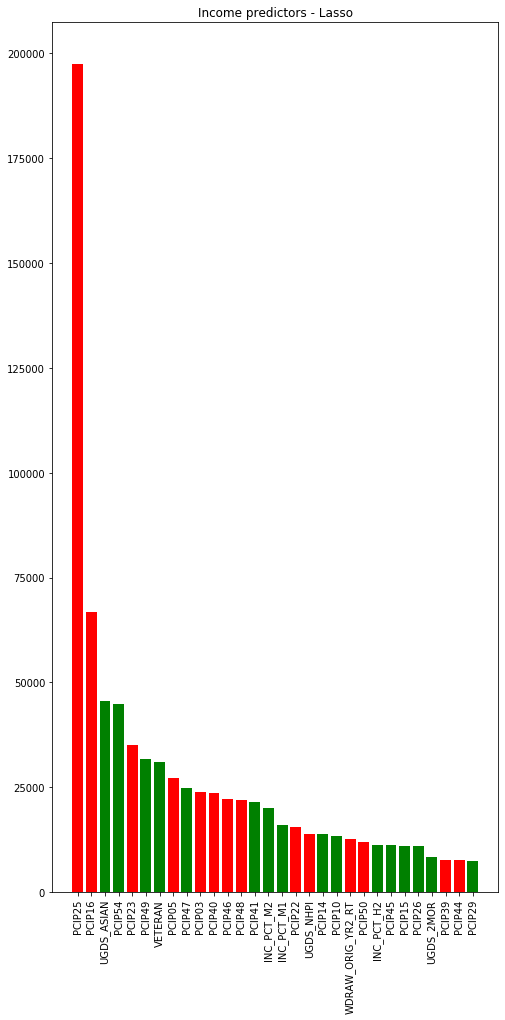

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'lasso_income_predictor.png', format = 'png' , bbox_inches='tight')

In [170]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.296815,title_iv.withdrawn_by.2yrs,88 Percent withdrawn from original institut...,"88 completion Name: dev-category, dtype: ob..."
1,UGDS_ASIAN,0.138866,demographics.race_ethnicity.asian,173 Total share of enrollment of undergradu...,"173 student Name: dev-category, dtype: object"
2,NOPELL_DEBT_N,0.110717,median_debt.number.no_pell_grant,81 The number of students in the median deb...,"81 aid Name: dev-category, dtype: object"
3,TUITFTE,0.101064,tuition_revenue_per_fte,133 Net tuition revenue per full-time equiv...,"133 school Name: dev-category, dtype: object"
4,PCIP50,0.076227,program_percentage.visual_performing,37 Percentage of degrees awarded in Visual ...,"37 academics Name: dev-category, dtype: object"
5,PCIP51,0.074945,program_percentage.health,15 Percentage of degrees awarded in Health ...,"15 academics Name: dev-category, dtype: object"
6,MARRIED,0.062299,demographics.married,168 Share of married students Name: NAME OF...,"168 student Name: dev-category, dtype: object"
7,SATMTMID,0.056095,sat_scores.midpoint.math,43 Midpoint of SAT scores at the institutio...,"43 admissions Name: dev-category, dtype: ob..."
8,PCIP14,0.044901,program_percentage.engineering,11 Percentage of degrees awarded in Enginee...,"11 academics Name: dev-category, dtype: object"
9,FEMALE,0.038071,demographics.female_share,166 Share of female students Name: NAME OF ...,"166 student Name: dev-category, dtype: object"


In [171]:
#now lets do the elastic net model

In [172]:
X = X_base_line
y = y_baseline

In [173]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [174]:
columns = X.columns.to_list()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [176]:
y_train_nat = y_train

In [177]:
y_train = y_train.ravel().reshape(1,-1)

In [178]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [179]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [180]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22362790417.536823, tolerance: 16698004248.356464
  positive)


0.7300865066245039

In [181]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [182]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [183]:
elastic_random.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.1s finished
C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18329584666.12703, tolerance: 16698004248.356464
  positive)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [184]:
predicted_y = elastic_random.predict(X_test)

In [185]:
elastic_random.score(X_test, y_test)

0.7988269834765955

In [186]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [187]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [188]:
model_best = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)


In [189]:
model_best.fit(X_train, y_train.ravel())


C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18329584666.12703, tolerance: 16698004248.356464
  positive)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [190]:
model_best.coef_

array([ 1.99118203e+03, -8.93392514e+00, -5.28282816e+02, -8.88965231e+00,
       -8.26789845e+01, -3.81437307e+01,  0.00000000e+00, -4.09687400e+00,
       -4.84425298e+01,  1.82106133e+03, -2.82484730e+03,  2.23883376e+02,
       -1.54883347e+03, -1.02174766e+01,  1.00693416e+01,  1.63016617e-01,
        1.69404652e+02, -2.62542411e+02,  2.04387177e+02,  1.87288181e+00,
       -9.72279996e-01, -3.71851153e-01,  5.62381480e+01, -4.55703969e+03,
        1.11976640e+02, -1.06396102e+03, -4.42454313e+03,  1.86823749e+03,
        2.72319138e+03,  1.09869883e+03, -3.64310008e+03,  1.31179224e+04,
        3.89624550e+03, -2.28069113e+03,  1.43986169e+03, -3.63559876e+02,
       -3.19855953e+03, -2.07537141e+03, -8.72822611e+01,  6.00471469e+03,
       -4.63336864e+02,  9.24233807e+02,  1.72553270e+02, -1.92413861e+03,
       -9.95568512e+02, -4.51418837e+03, -1.52475673e+03,  1.42138317e+02,
       -3.21582360e+03, -6.76111649e+02, -3.52092299e+03, -3.74730093e+02,
       -2.81026020e+02,  

In [191]:
columns = X_train.columns

In [192]:
elasticnet_results = {'columns': columns, 'coefficient': model_best.coef_}

In [193]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [194]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [195]:
number_of_features = 30
elasticnet_results_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [196]:
elasticnet_results_df

,columns,coefficient,abs(coef_)
31,PCIP14,13117.922438,13117.922438
65,UGDS_ASIAN,12841.960691,12841.960691
56,PCIP50,-8990.027914,8990.027914
100,WDRAW_ORIG_YR2_RT,-8022.357545,8022.357545
145,FEMALE,-7501.119190,7501.119190
103,INC_PCT_M2,6739.836064,6739.836064
57,PCIP51,6584.769642,6584.769642
102,INC_PCT_M1,6318.543539,6318.543539
39,PCIP26,6004.714687,6004.714687
55,PCIP49,5926.792496,5926.792496


In [197]:
mask = elasticnet_results_df['coefficient'] > 0

In [198]:
x = elasticnet_results_df['columns']
y = elasticnet_results_df['abs(coef_)']

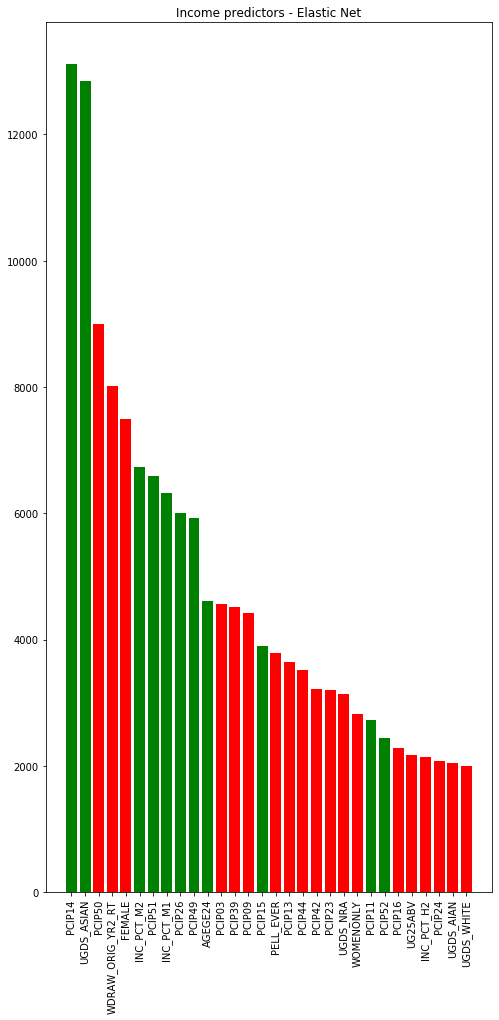

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'elastic_net_income_predictor.png', format = 'png' , bbox_inches='tight')

21 features, reduction of 87.57%


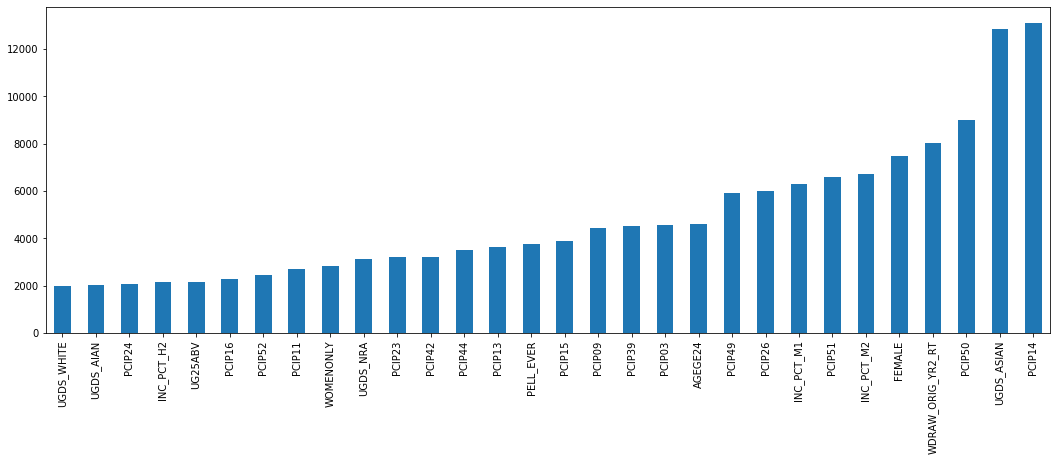

In [200]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(model_best.coef_))

n_selected_features = (feature_importance>3000).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))



In [201]:
feature_importance.sort_values(ascending = False).head(50)

PCIP14                  13117.922438
UGDS_ASIAN              12841.960691
PCIP50                   8990.027914
WDRAW_ORIG_YR2_RT        8022.357545
FEMALE                   7501.119190
INC_PCT_M2               6739.836064
PCIP51                   6584.769642
INC_PCT_M1               6318.543539
PCIP26                   6004.714687
PCIP49                   5926.792496
AGEGE24                  4618.180528
PCIP03                   4557.039694
PCIP39                   4514.188368
PCIP09                   4424.543127
PCIP15                   3896.245496
PELL_EVER                3782.006991
PCIP13                   3643.100085
PCIP44                   3520.922990
PCIP42                   3215.823602
PCIP23                   3198.559532
UGDS_NRA                 3136.217772
WOMENONLY                2824.847297
PCIP11                   2723.191382
PCIP52                   2448.340323
PCIP16                   2280.691126
UG25ABV                  2175.310137
INC_PCT_H2               2141.778228
P